In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [23]:
lr_ = 0.01 

In [8]:
url = 'https://raw.githubusercontent.com/st119848/dataset/master/titanic_train.csv'
df = pd.read_csv(url)

In [9]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S


In [10]:
df.iloc[:,5].fillna(value=df.iloc[:,5].mean(), inplace=True)

In [11]:
df = df.replace(["male", "female"], [0, 1])

In [12]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
643,644,1,3,"Foo, Mr. Choong",0,29.699118,0,0,1601,56.4958,NaN,S
580,581,1,2,"Christy, Miss. Julie Rachel",1,25.000000,1,1,237789,30.0000,NaN,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",1,39.000000,1,0,13507,55.9000,E44,S
340,341,1,2,"Navratil, Master. Edmond Roger",0,2.000000,1,1,230080,26.0000,F2,S
466,467,0,2,"Campbell, Mr. William",0,29.699118,0,0,239853,0.0000,NaN,S


In [13]:
y = df.iloc[:,[1]]
interest_columns = df.columns[[4,5,9]]
col_num = len(interest_columns)
X = df[interest_columns]

In [14]:
X.sample(5)

,Sex,Age,Fare
152,0,55.5,8.0500
526,1,50.0,10.5000
434,0,50.0,55.9000
135,0,23.0,15.0458
365,0,30.0,7.2500


In [15]:
y = y.astype(np.float32).values
X = X.astype(np.float32).values

In [16]:
print(X.shape)
print(y.shape)

(891, 3)
(891, 1)


In [17]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 100)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size = 0.8,random_state = 100)

In [19]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(569, 3) (569, 1) (143, 3) (143, 1) (179, 3) (179, 1)


In [20]:
np.random.seed(2)
model = Sequential()

model.add(Dense(2, input_shape=(col_num,)))
model.add(Activation("linear"))

model.add(Dense(2))
model.add(Activation("relu"))

output_num = 1 # One value representing if the passenger survived
model.add(Dense(output_num))
model.add(Activation("sigmoid"))

In [24]:
model.compile(optimizer=Adam(lr=lr_),loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=400, batch_size=32,validation_data=(X_val,y_val))

Epoch 1/400
18/18 [==============================] - 1s 15ms/step - loss: 0.7173 - accuracy: 0.5067 - val_loss: 0.6674 - val_accuracy: 0.7273
Epoch 2/400
18/18 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.7961 - val_loss: 0.6379 - val_accuracy: 0.7273
Epoch 3/400
18/18 [==============================] - 0s 3ms/step - loss: 0.5998 - accuracy: 0.8136 - val_loss: 0.6143 - val_accuracy: 0.7273
Epoch 4/400
18/18 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.8077 - val_loss: 0.6034 - val_accuracy: 0.7273
Epoch 5/400
18/18 [==============================] - 0s 4ms/step - loss: 0.5413 - accuracy: 0.8009 - val_loss: 0.5963 - val_accuracy: 0.7273
Epoch 6/400
18/18 [==============================] - 0s 4ms/step - loss: 0.5150 - accuracy: 0.8154 - val_loss: 0.5895 - val_accuracy: 0.7273
Epoch 7/400
18/18 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7929 - val_loss: 0.5879 - val_accuracy: 0.7273
Epoch 8/400


In [26]:
y_predict = np.round(model.predict(X_test))

In [27]:
np.sum(y_test == y_predict)/y_test.shape[0]

0.7821229050279329

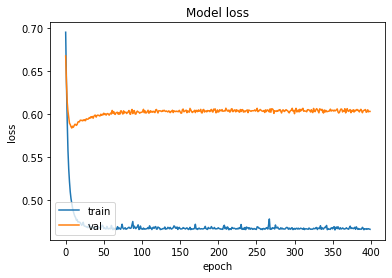

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.show()

In [30]:
url = 'https://github.com/Nine587403/DataScience2/blob/main/pima-indians-diabetes%20(1).csv?raw=true'
df_pid = pd.read_csv(url)

In [31]:
df_pid.sample(5)

,6,148,72,35,0,33.6,0.627,50,1
157,2,88,74,19,53,29.0,0.229,22,0
571,3,111,58,31,44,29.5,0.430,22,0
750,1,121,78,39,74,39.0,0.261,28,0
660,1,199,76,43,0,42.9,1.394,22,1
671,10,68,106,23,49,35.5,0.285,47,0


In [32]:
df_pid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
df_pid.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
for i in range(5):
  df_pid.iloc[:,i+1].replace(0,df_pid.iloc[:,i+1].mean(),inplace = True)

In [35]:
df_pid.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.647061,72.254967,26.589955,118.761425,32.449277,0.471674,33.219035,0.348110
std,3.370877,30.441014,12.123879,9.636265,93.109342,6.879736,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,20.517601,79.903520,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.903520,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
y = df_pid.iloc[:,[8]]
interest_columns = df_pid.columns[0:8]
col_num = len(interest_columns)
X = df_pid[interest_columns]

In [37]:
X.sample(5)

,6,148,72,35,0,33.6,0.627,50
165,3,148.0,66.000000,25.000000,79.90352,32.5,0.256,22
298,8,112.0,72.000000,20.517601,79.90352,23.6,0.840,58
239,1,91.0,64.000000,24.000000,79.90352,29.2,0.192,21
143,4,154.0,62.000000,31.000000,284.00000,32.8,0.237,23
618,0,119.0,69.101695,20.517601,79.90352,32.4,0.141,24


In [38]:
y = y.astype(np.float32).values
X = X.astype(np.float32).values

In [39]:
print(X.shape)
print(y.shape)

(767, 8)
(767, 1)


In [40]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 100)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size = 0.8,random_state = 100)

In [42]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(490, 8) (490, 1) (123, 8) (123, 1) (154, 8) (154, 1)


In [43]:
np.random.seed(2)
model = Sequential()

model.add(Dense(2, input_shape=(col_num,)))
model.add(Activation("relu"))

model.add(Dense(2))
model.add(Activation("relu"))

output_num = 1 
model.add(Dense(output_num))
model.add(Activation("sigmoid"))

In [44]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=Adam(lr=lr_))

In [45]:
history = model.fit(X_train, y_train, epochs=400, batch_size=32,validation_data=(X_val,y_val))

Epoch 1/400
16/16 [==============================] - 1s 13ms/step - loss: 0.6590 - accuracy: 0.6453 - val_loss: 0.6463 - val_accuracy: 0.6423
Epoch 2/400
16/16 [==============================] - 0s 4ms/step - loss: 0.6261 - accuracy: 0.6681 - val_loss: 0.6338 - val_accuracy: 0.6423
Epoch 3/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5911 - accuracy: 0.7024 - val_loss: 0.6244 - val_accuracy: 0.6423
Epoch 4/400
16/16 [==============================] - 0s 4ms/step - loss: 0.6032 - accuracy: 0.6708 - val_loss: 0.6134 - val_accuracy: 0.6423
Epoch 5/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5749 - accuracy: 0.6942 - val_loss: 0.6023 - val_accuracy: 0.6423
Epoch 6/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5961 - accuracy: 0.6474 - val_loss: 0.5893 - val_accuracy: 0.6423
Epoch 7/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5859 - accuracy: 0.6387 - val_loss: 0.5772 - val_accuracy: 0.6423
Epoch 8/400


In [46]:
y_predict = np.round(model.predict(X_test))

In [47]:
np.sum(y_test == y_predict)/y_test.shape[0]

0.7532467532467533

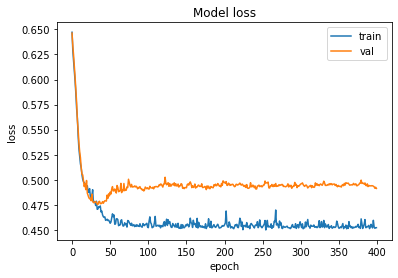

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

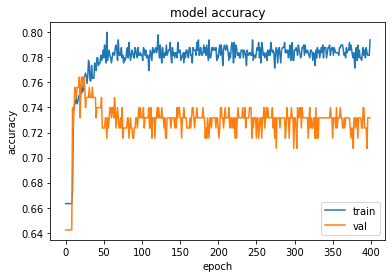

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.title('model accuracy')
plt.show()

In [50]:
from keras.datasets import mnist

In [51]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [52]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


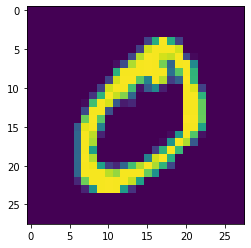

In [53]:
element = 1
plt.imshow(X_train[element])
plt.show()

In [54]:
X_train = X_train.reshape((-1, 28*28)) 
X_test = X_test.reshape((-1, 784))

In [55]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [56]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [57]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size = 0.8,random_state = 100)

In [58]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [59]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val,y_val)

(48000, 784) (48000, 10) (10000, 784) (10000, 10) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [60]:
np.random.seed(2)
model = Sequential()

model.add(Dense(2, input_shape=(784,)))
model.add(Activation("relu"))

model.add(Dense(2))
model.add(Activation("relu"))

output_num = 10 
model.add(Dense(output_num))
model.add(Activation("sigmoid"))

In [61]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=Adam(lr=lr_))

In [62]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_val,y_val))

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3969 - accuracy: 0.1044 - val_loss: 0.3251 - val_accuracy: 0.1138
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3250 - accuracy: 0.1123 - val_loss: 0.3251 - val_accuracy: 0.1025
Epoch 3/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3250 - accuracy: 0.1112 - val_loss: 0.3250 - val_accuracy: 0.1025
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3250 - accuracy: 0.1075 - val_loss: 0.3250 - val_accuracy: 0.1138
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3250 - accuracy: 0.1100 - val_loss: 0.3251 - val_accuracy: 0.1138
Epoch 6/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3251 - accuracy: 0.1095 - val_loss: 0.3251 - val_accuracy: 0.1138
Epoch 7/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3251 - accuracy: 0.1103 - val_loss: 0.3250 - val_ac

In [63]:
y_predict = np.round(model.predict(X_test))

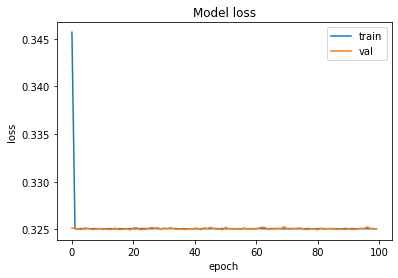

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

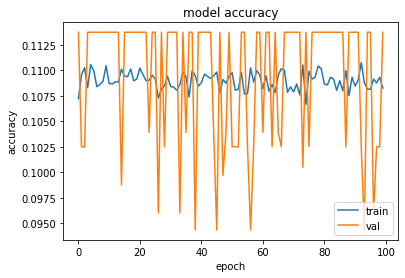

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.title('model accuracy')
plt.show()